# Unwarp images

In [8]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"

# Load Camera calibration params
[warped_images, M_values, Minv_values ] = pickle.load(open( "pickle_data/warped_images_params.p", "rb" ) )
[lineLeft, lineRight ] = pickle.load(open( "pickle_data/lines_lane.p", "rb" ) )
und_images = pickle.load(open( "pickle_data/undistorted_images.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 19941 bytes to 0. Functions_Clases Pipeline.py


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

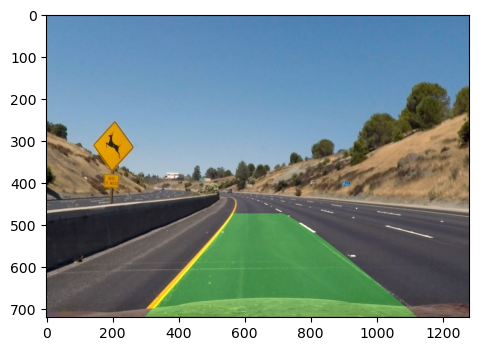

In [12]:
currentIndex = 3

warp_zero = np.zeros_like(warped_images[currentIndex]).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

pts_left = np.array([np.transpose(np.vstack([lineLeft.poly_plotx, lineLeft.poly_ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([lineRight.poly_plotx, lineRight.poly_ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

newwarp = cv2.warpPerspective(color_warp, M_values[currentIndex], (und_images[currentIndex].shape[1], und_images[0].shape[0])) 
result = cv2.addWeighted(und_images[currentIndex], 1, newwarp, 0.3, 0)


displayListImages([result],cols=2,cmap='gray',figSize=[12,2])

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

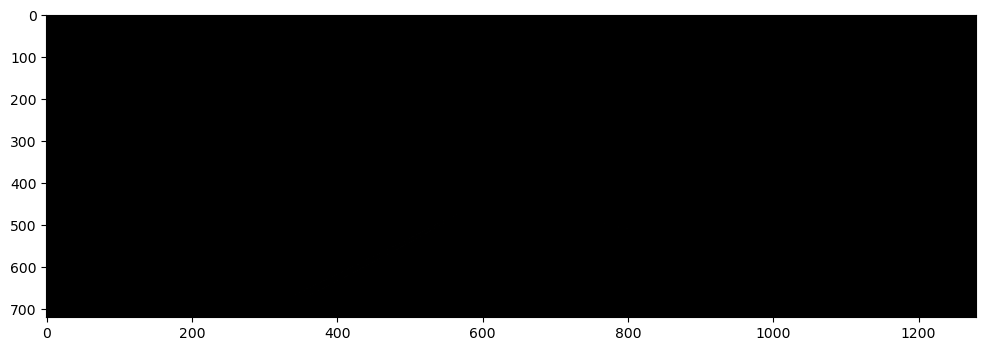

In [36]:
currentIndex = 3

unwarped_img, M, M_inv = warp_image(warped_images[currentIndex], conversion= 'unwarp', hwidth = 250 ,offset = 0, height = -600, overplotLines = False )
gray_three = cv2.merge([unwarped_img,unwarped_img,unwarped_img])

image_out = cv2.addWeighted(gray_three, 1,und_images[currentIndex] , 0.2, 0.0)

displayListImages([gray_three],cols=1,cmap='gray',figSize=[12,4])